#Run all cell
https://stackoverflow.com/questions/46565739/how-would-i-make-this-work-n-in-a-filepath-not-intentional

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Library


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using pandas module in python to find the average baby weight in 
```
import pandas as pd
nsfg = pd.read_hdf('nsfg.hdf5','nsfg')
type(nsfg)

#Primary data stucture Pandas use to store data
```

In [3]:
import pandas as pd
nsfg = pd.read_hdf('/content/drive/MyDrive/DataCamp and Linkedin Learning/CAREER TRACK Data Analyst with Python/Dataset/Exploratory Data Analysis in Python/nsfg.hdf5','nsfg')
type(nsfg)

pandas.core.frame.DataFrame

###Attribute của dataset

* .shape
* .columns

##Clean and validate

In [4]:
pounds = nsfg['birthwgt_lb1']

ounces = nsfg['birthwgt_oz1']

###Validate data: confirming data is interpreting correctly

theo mặc định, data sort theo giá trị nhiều nhất nên ở đây dùng `.sort_index()` để sort theo value

In [5]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

**ở trên ta có thể thấy phần lớn em bé nặng khảng 4-9, có vài em bé rất nhẹ và 98,99 nghĩa là missing data**

### validate the result bằng cách **comparing themn to the code book**
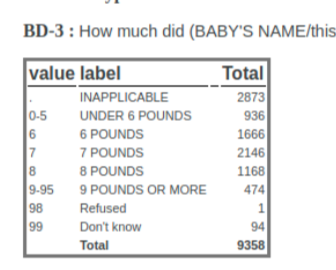

###1 cách nữa để validate: .decribe()

In [7]:
pounds.describe()
#Here the mean at 8.05 which does not mean much because of the special value(98,99) as outliner

count    6485.000000
mean        8.055204
std        11.178893
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        99.000000
Name: birthwgt_lb1, dtype: float64

Dùng replace vì 98 và 99 đại diện cho Refused & Dont know

In [13]:
pounds = pounds.replace([98,99], np.nan)
#mean of pounds will make more sense
pounds.mean()

6.703286384976526

###Bây giờ có thấy việc phải reassign giá trị khi dùng `.replace()`

To bypass this just use the inplace = True arg

In [14]:
ounces.replace([98,99], np.nan, inplace = True) 
#We didn't make a new series so we dont need to assign it back to ounces

###Arithmetic operator: Work with Series object

Để đổi từ ounces -> pounds: chia 16

In [15]:
birth_wieght = pounds + ounces/16